In [81]:
import librosa
import numpy as np
from natsort import natsorted
import os
from os import walk
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
import librosa.display
import pickle

In [85]:
######load your data#######
# load your data
paths = [
"/Users/mezaga93/Downloads/sintesis_dataset/res/",
"/Users/mezaga93/Downloads/sintesis_dataset/am/",
"/Users/mezaga93/Downloads/sintesis_dataset/waveshapping/",
"/Users/mezaga93/Downloads/sintesis_dataset/fm/",
"/Users/mezaga93/Downloads/sintesis_dataset/grain/"
         ]
#print(paths)
audios = []
labels = []
labelsname = []
for i in paths:
    for (dirpath, dirnames, filenames) in walk(i):
      #print(dirpath)
      for directory in dirpath:
        for filename in filenames:
          if filename.endswith("wav"):
            #print(filename)
            audios.append(os.path.join(dirpath, filename))
        break
print(len(audios))
###esto arregla el orden de importacion de los audios
audios = natsorted(audios)

5000


In [88]:
waveforms = []
sr = 48000
sr16k = 16000
secs = 1

for track in audios:
  if track.endswith("wav"):
    y,fs = librosa.load(track, sr)
    waveforms.append(librosa.resample(y[:48000* secs], orig_sr= sr,target_sr= sr16k))
    #waveforms.append(y)
waveforms = np.array(waveforms)
print(waveforms.shape)

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_3050/1421599622.py:8: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y,fs = librosa.load(track, sr)


In [63]:
import IPython.display
import numpy as np
import json

def Audio(audio: np.ndarray, sr: int):
    """
    Use instead of IPython.display.Audio as a workaround for VS Code.
    `audio` is an array with shape (channels, samples) or just (samples,) for mono.
    """

    if np.ndim(audio) == 1:
        channels = [audio.tolist()]
    else:
        channels = audio.tolist()

    return IPython.display.HTML("""
        <script>
            if (!window.audioContext) {
                window.audioContext = new AudioContext();
                window.playAudio = function(audioChannels, sr) {
                    const buffer = audioContext.createBuffer(audioChannels.length, audioChannels[0].length, sr);
                    for (let [channel, data] of audioChannels.entries()) {
                        buffer.copyToChannel(Float32Array.from(data), channel);
                    }
            
                    const source = audioContext.createBufferSource();
                    source.buffer = buffer;
                    source.connect(audioContext.destination);
                    source.start();
                }
            }
        </script>
        <button onclick="playAudio(%s, %s)">Play</button>
    """ % (json.dumps(channels), sr))

In [64]:
Audio(waveforms[100], sr16k)


In [86]:
fx = ["res","am","waveshapping", "fm","grain"]


[0]


TypeError: 'NoneType' object is not subscriptable

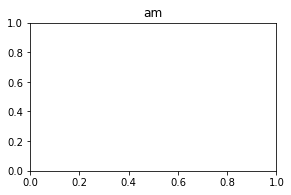

In [87]:
####visualización de los audios antes de normalizar
plt.figure(figsize=(15, 6))
sonidos = [i for i in range(0,50,1020)]
print(sonidos)
#sonidos = [i * 690 for i in range(13)]
for i, x in enumerate(sonidos):
    plt.subplot(2, 3, i + 1).set_title(fx[i])
    librosa.display.waveshow(waveforms[x],sr16k)
#plt.yticks([-1,0,1])
plt.tight_layout()
#plt.title("Waveforms")
plt.show()

In [67]:
#######PCA dominio de la frecuencia ####
fft_pca = []
for i in waveforms:
  x_fft = np.fft.fft(i)
  x_fft = librosa.amplitude_to_db(np.abs(i))
  fft_pca.append(x_fft)

fft_pca = np.array(fft_pca)

mu_fft = np.mean(fft_pca, axis = 0)
Xmu_fft = fft_pca - mu_fft
s_fft = np.std(fft_pca, axis = 0)
Xmu_FFT = Xmu_fft/s_fft

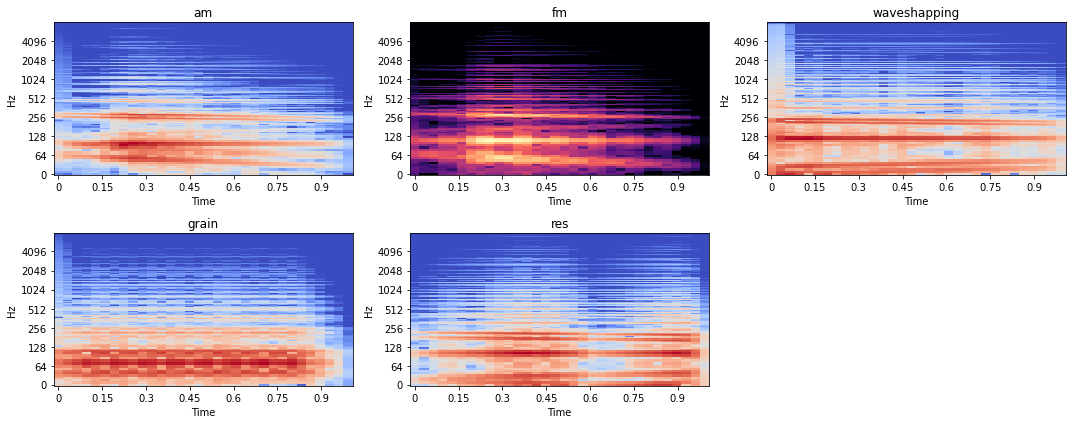

In [68]:
plt.figure(figsize=(15, 6))#.suptitle("STFT Data")
plt.title('stft')
sonidos = [i for i in range(0,5000,1020)]
for i, x in enumerate(sonidos):
    plt.subplot(2, 3, i + 1).set_title(fx[i])
    stft = librosa.stft(waveforms[i])#, n_fft=512, hop_length= (512-1)//2)
    stft = librosa.amplitude_to_db(np.abs(stft))
    librosa.display.specshow(stft,sr = sr16k, y_axis='log', x_axis='time')
plt.tight_layout()

plt.show()

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_3050/497446860.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.5098567  0.08516057 0.03487305]


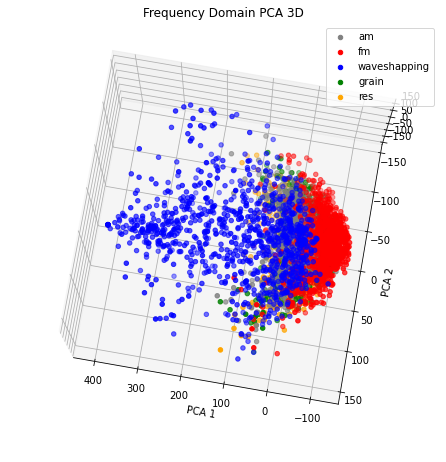

In [69]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:999, 0], X_PCA[:999, 1],X_PCA[:999, 2], c='gray', label= fx[0]) 
ax.scatter3D(X_PCA[999:1999, 0], X_PCA[999:1999, 1],X_PCA[999:1999, 2], c='red', label= fx[1])
ax.scatter3D(X_PCA[1999:2999, 0], X_PCA[1999:2999, 1],X_PCA[1999:2999, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2999:3999, 0], X_PCA[2999:3999, 1],X_PCA[2999:3999, 2], c='green', label= fx[3])
ax.scatter3D(X_PCA[3999:4999, 0], X_PCA[3999:4999, 1],X_PCA[3999:4999, 2], c='orange', label= fx[4])
fig.add_axes(ax)
ax.view_init(80,100)
plt.legend()
plt.title('Frequency Domain PCA 3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.5098567  0.08516058]


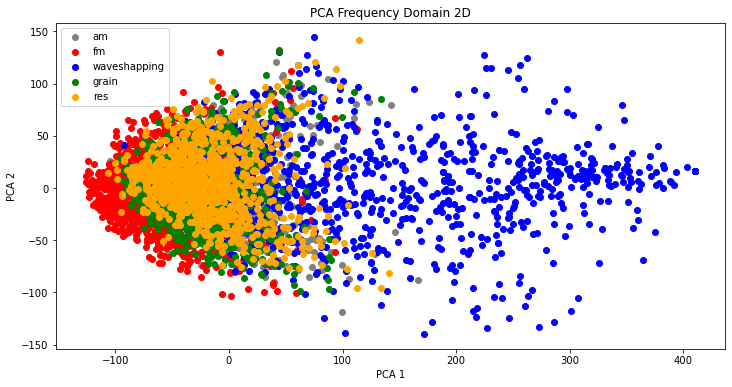

In [70]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:999, 0], X_PCA[:999, 1], c='gray', label= fx[0])
plt.scatter(X_PCA[999:1999, 0], X_PCA[999:1999, 1], c='red', label= fx[1])
plt.scatter(X_PCA[1999:2999, 0], X_PCA[1999:2999, 1], c='blue', label= fx[2])
plt.scatter(X_PCA[2999:3999, 0], X_PCA[2999:3999, 1], c='green', label= fx[3])
plt.scatter(X_PCA[3999:4999, 0], X_PCA[3999:4999, 1], c='orange', label= fx[4])

plt.legend()
plt.title('PCA Frequency Domain 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [84]:
with open('/Users/mezaga93/Desktop/sintesis2_aciml.pkl', 'wb') as f:
    waveforms = pickle.dump(waveforms, f)


In [54]:
print(waveforms.shape)

AttributeError: 'NoneType' object has no attribute 'shape'